## Install Libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import h5py

In [2]:
pip install pyyaml h5py 

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [22]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import numpy as np
from keras.models import load_model
import cv2
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from time import sleep
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report


## Visualize Data 

In [24]:
picture_size=48

In [25]:
folder_path = "D:/Project_Major/fer dataset/"

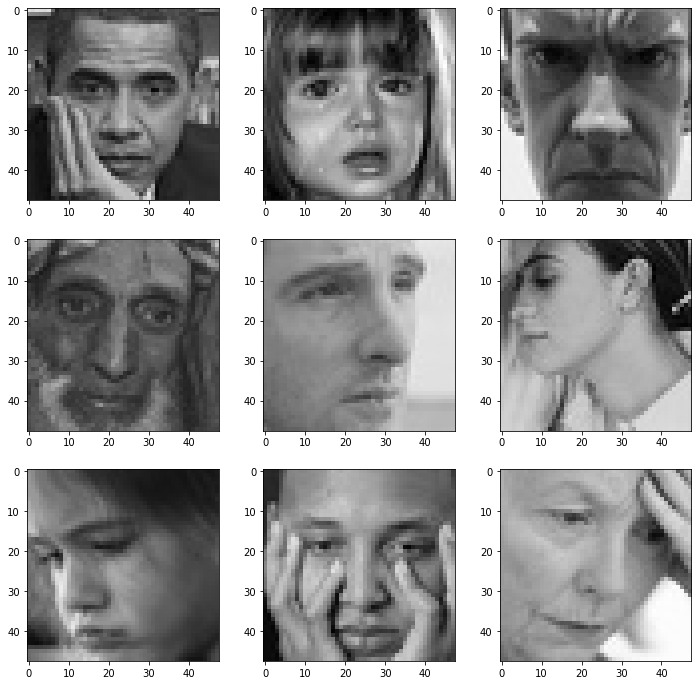

In [26]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

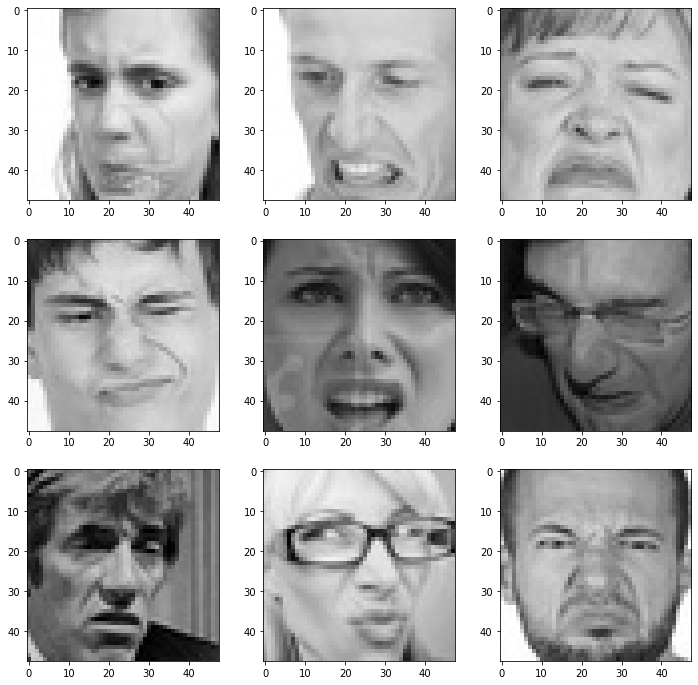

In [27]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Load Data

In [28]:
batch_size=64
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)


test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [51]:
def baseline_model(no_of_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(48,48,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(no_of_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

In [54]:
model_base=baseline_model(7)

In [55]:
model_base.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 30976)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               3965056   
                                                      

In [56]:
epochs=30

In [58]:
checkpoint_path_base = "D:\Project_Major\model file base\cp.ckpt"
checkpoint_dir_base = os.path.dirname(checkpoint_path_base)

In [59]:
checkpoint_base = ModelCheckpoint(filepath=checkpoint_path_base, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [60]:
history = model_base.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=[checkpoint_base]
                                )

Epoch 1/30


C:\Users\dell\AppData\Local\Temp/ipykernel_14160/775425324.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_base.fit_generator(generator=train_set,


448/448 [==============================] - 612s 1s/step - loss: 13.0883 - accuracy: 0.1662 - val_loss: 1.9705 - val_accuracy: 0.2464
Epoch 2/30
448/448 [==============================] - 185s 413ms/step - loss: 2.5128 - accuracy: 0.2144 - val_loss: 1.9519 - val_accuracy: 0.2483
Epoch 3/30
448/448 [==============================] - 122s 271ms/step - loss: 2.0871 - accuracy: 0.2367 - val_loss: 1.9493 - val_accuracy: 0.2476
Epoch 4/30
448/448 [==============================] - 118s 264ms/step - loss: 2.0175 - accuracy: 0.2438 - val_loss: 1.9481 - val_accuracy: 0.2475
Epoch 5/30
448/448 [==============================] - 119s 265ms/step - loss: 1.9894 - accuracy: 0.2495 - val_loss: 1.9474 - val_accuracy: 0.2472
Epoch 6/30
448/448 [==============================] - 120s 269ms/step - loss: 1.9834 - accuracy: 0.2496 - val_loss: 1.9468 - val_accuracy: 0.2473
Epoch 7/30
448/448 [==============================] - 121s 269ms/step - loss: 1.9742 - accuracy: 0.2493 - val_loss: 1.9463 - val_accuracy

In [106]:
model_base.save("model_base.h5")

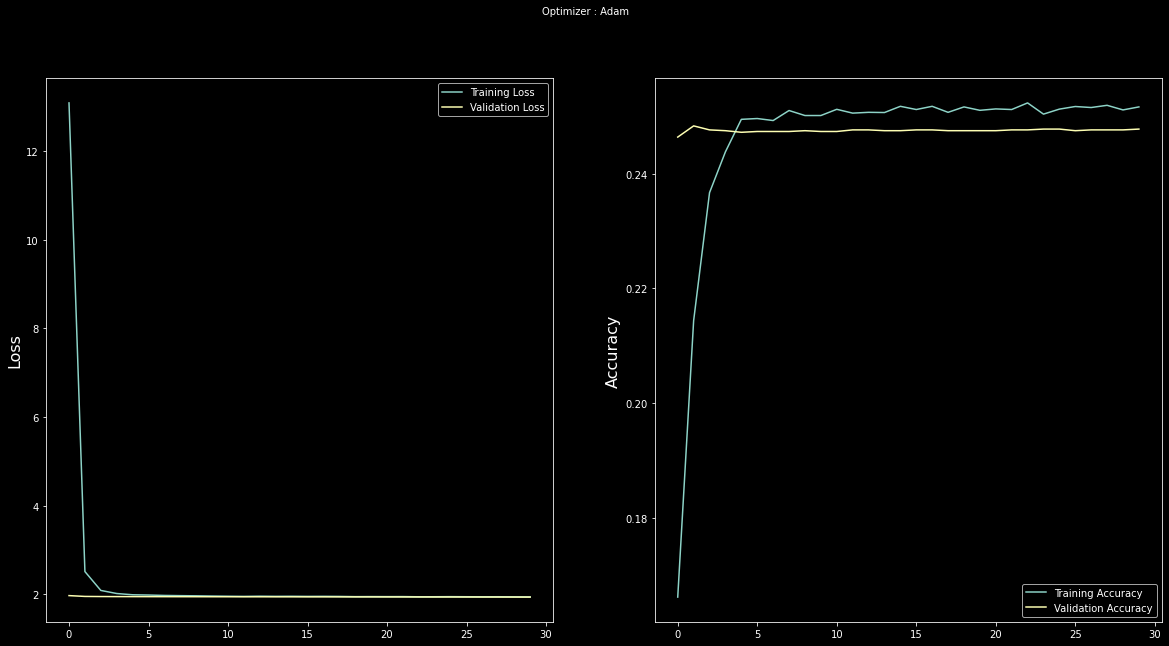

In [62]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Face Cascade

In [ ]:
cascade_file = "D:/Project_Major/haarcascade_frontalface_default.xml"
def load_face_cascade(cascade_file):
    face_cascade = cv2.CascadeClassifier(cascade_file)
    return face_cascade

def apply_face_cascade_on_images(face_cascade, frame_path):
    faces_roi_list=[]
    frame=cv2.imread(frame_path)
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess=face_cascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                faces_roi=roi_color[ey:ey+eh, ex:ex+ew]
                faces_roi_list.append(faces_roi)
    if len(faces_roi_list)==0:
        return frame
    return faces_roi_list[0]

## Test Output

In [95]:
def predict_emotion(model, frame):
    frame=cv2.imread(frame)
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    final_image=cv2.resize(frame, (48, 48))
    final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
    final_image=np.expand_dims(final_image, axis=0)
    final_image=final_image/255.0
    
    Predictions =model_base.predict(final_image)
    pred=Predictions.argmax()
    return pred


In [113]:
frame_path=cv2.imread(frame_path)

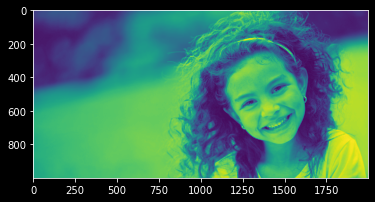

In [114]:
plt.imshow(cv2.cvtColor(frame_path, cv2.COLOR_BGR2GRAY))

In [96]:
pred=predict_emotion(model_base, frame_path)

1/1 [==============================] - 0s 299ms/step


In [105]:
pred

3

In [119]:
emotions[pred]

'Happy'

In [120]:
#cascade_file = "D:/Project_Major/haarcascade_frontalface_default.xml"
test_path = "D:/Project_Major/fer dataset/test"
dir_list = os.listdir(test_path)
y_true =[]
y_pred=[]
face_cascade = load_face_cascade(cascade_file)
for i, file in enumerate(dir_list):
    label_dir = test_path+'/'+ file
    #label_dir = os.path.join(test_path, file)
    print(label_dir)
    for img in os.listdir(label_dir):
        #print(label_dir)
        #print(img)
        img=label_dir+'/'+img
        #faces_roi = apply_face_cascade_on_images(face_cascade, img)
        #print(faces_roi.shape)
        pred = predict_emotion(model_base,img)
        y_true.append(i)
        y_pred.append(pred)


D:/Project_Major/fer dataset/test/angry
1/1 [==============================] - 0s 184ms/step
D:/Project_Major/fer dataset/test/disgust
1/1 [==============================] - 0s 325ms/step
D:/Project_Major/fer dataset/test/fear
1/1 [==============================] - 0s 209ms/step
D:/Project_Major/fer dataset/test/happy
1/1 [==============================] - 0s 164ms/step
D:/Project_Major/fer dataset/test/neutral
1/1 [==============================] - 0s 266ms/step
D:/Project_Major/fer dataset/test/sad
1/1 [==============================] - 0s 253ms/step
D:/Project_Major/fer dataset/test/surprise
1/1 [==============================] - 0s 483ms/step


In [121]:
emotions = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

In [122]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=emotions))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       958
     Disgust       0.00      0.00      0.00       111
        Fear       0.00      0.00      0.00      1024
       Happy       0.25      1.00      0.40      1774
     Neutral       0.00      0.00      0.00      1233
         Sad       0.00      0.00      0.00      1247
    Surprise       0.00      0.00      0.00       831

    accuracy                           0.25      7178
   macro avg       0.04      0.14      0.06      7178
weighted avg       0.06      0.25      0.10      7178



In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[   0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,  111,    0,    0,    0],
       [   0,    0,    0, 1024,    0,    0,    0],
       [   0,    0,    0, 1774,    0,    0,    0],
       [   0,    0,    0, 1232,    0,    1,    0],
       [   0,    0,    0, 1247,    0,    0,    0],
       [   0,    0,    0,  830,    0,    1,    0]], dtype=int64)

In [103]:
np.unique(y_pred)

array([3, 5], dtype=int64)

In [104]:
test_path = "D:/Project_Major/fer dataset/test"
dir_list = os.listdir(test_path)
y_true =[]
y_pred=[]
face_cascade = load_face_cascade(cascade_file)
for i, file in enumerate(dir_list):
    label_dir = test_path+'/'+ file
    #label_dir = os.path.join(test_path, file)
    print(label_dir)
    for img in os.listdir(label_dir):
        #print(label_dir)
        print(img)
        img=label_dir+'/'+img
        faces_roi = apply_face_cascade_on_images(face_cascade, img)
        print(faces_roi.shape)
        pred = predict_emotion(model_base,img)
        y_true.append(i)
        y_pred.append(pred)

D:/Project_Major/fer dataset/test/angry
PrivateTest_10131363.jpg
(48, 48, 3)
1/1 [==============================] - 0s 175ms/step
PrivateTest_10304478.jpg
(48, 48, 3)
1/1 [==============================] - 0s 294ms/step
PrivateTest_1054527.jpg
(48, 48, 3)
1/1 [==============================] - 0s 136ms/step
PrivateTest_10590091.jpg
(48, 48, 3)
1/1 [==============================] - 0s 136ms/step
PrivateTest_1109992.jpg
(48, 48, 3)
1/1 [==============================] - 0s 214ms/step
PrivateTest_11296953.jpg
(48, 48, 3)
1/1 [==============================] - 0s 178ms/step
PrivateTest_12000629.jpg
(48, 48, 3)
1/1 [==============================] - 0s 231ms/step
PrivateTest_12008383.jpg
(48, 48, 3)
1/1 [==============================] - 0s 195ms/step
PrivateTest_12191716.jpg
(48, 48, 3)
1/1 [==============================] - 0s 192ms/step
PrivateTest_1221822.jpg
(29, 29, 3)
1/1 [==============================] - 0s 229ms/step
PrivateTest_12403575.jpg
(48, 48, 3)
1/1 [=====================

In [107]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=emotions))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       958
     Disgust       0.00      0.00      0.00       111
        Fear       0.00      0.00      0.00      1024
       Happy       0.25      1.00      0.40      1774
     Neutral       0.00      0.00      0.00      1233
         Sad       0.00      0.00      0.00      1247
    Surprise       0.00      0.00      0.00       831

    accuracy                           0.25      7178
   macro avg       0.04      0.14      0.06      7178
weighted avg       0.06      0.25      0.10      7178



In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[   0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,  111,    0,    0,    0],
       [   0,    0,    0, 1024,    0,    0,    0],
       [   0,    0,    0, 1774,    0,    0,    0],
       [   0,    0,    0, 1232,    0,    1,    0],
       [   0,    0,    0, 1247,    0,    0,    0],
       [   0,    0,    0,  830,    0,    1,    0]], dtype=int64)

In [109]:
pwd

'C:\\Users\\dell'